In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm




#auctions = pd.read_csv('data\auctions.csv.gzip', compression = 'gzip', low_memory=False) 
#, dtype= {'country' : 'category' ,'device_id' : 'category', 'platform':'category', 'ref_type_id':'category','source_id':'category'})
clicks = pd.read_csv('data\clicks.csv.gzip',compression = 'gzip')
events = pd.read_csv('data\events.csv.gzip',compression = 'gzip',low_memory=False)
installs = pd.read_csv('data\installs_train.csv', dtype= {'device_countrycode' : 'category','device_brand' : 'category','device_model' : 'category','session_user_agent' : 'category','user_agent' : 'category', 'device_language': 'category','kind': 'category','wifi': 'category','trans_id': 'category', 'ref_type': 'category'})
target = pd.read_csv("C:/roberto/target_competencia.csv", dtype= {'index' : 'int16' ,'ref_hash' : 'int64','obj_Sc' : 'int16','obj_St' : 'int16'  })




# Explorando **Installs**

In [9]:
installs.dtypes

created                 object
application_id           int64
ref_type              category
ref_hash                 int64
click_hash             float64
attributed                bool
implicit                  bool
device_countrycode    category
device_brand          category
device_model          category
session_user_agent    category
user_agent            category
event_uuid              object
kind                  category
wifi                  category
trans_id              category
ip_address               int64
device_language       category
dtype: object

In [12]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18


# Top 5 instalaciones por modelo y marca

In [20]:
installs['device_model'].value_counts()[0:5]

2.33194661091417e+18      759
6.88241452041436e+18      276
2.616228068988996e+18      76
7.787530752469096e+18      65
2.9282623200704937e+18     63
Name: device_model, dtype: int64

In [64]:
installs['device_brand'].value_counts()[0:5]

3.083058605577787e+17     472
2.208834667126999e+18     185
2.5232459822329236e+18    116
5.951324980112395e+18      72
2.987569314309514e+18      40
Name: device_brand, dtype: int64

In [ ]:
installs['device_brand'].value_counts()[0:5]

# Convirtiendo 'create' en Datetime

## Revisando Formato

In [34]:
installs['created'][0]

'2019-03-13 01:43:33.445'

In [22]:
pd.to_datetime(installs['created'][0], format='%Y-%m-%d %H:%M:%S.%f')

Timestamp('2019-03-13 01:43:33.445000')

In [23]:
installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S.%f')

In [24]:
installs['created'][0].date()

datetime.date(2019, 3, 13)

In [25]:
installs.dtypes

created               datetime64[ns]
application_id                 int64
ref_type                    category
ref_hash                       int64
click_hash                   float64
attributed                      bool
implicit                        bool
device_countrycode          category
device_brand                category
device_model                category
session_user_agent          category
user_agent                  category
event_uuid                    object
kind                        category
wifi                        category
trans_id                    category
ip_address                     int64
device_language             category
dtype: object

In [62]:
installs['created'].dt.date.head()

0    2019-03-13
1    2019-03-13
2    2019-03-13
3    2019-03-13
4    2019-03-10
Name: created, dtype: object

# Explorando installs por fecha por marca

## Creando columna de sólo de fecha

In [28]:
installs['date'] = installs['created'].dt.date

In [35]:
installs['date'] = pd.to_datetime(installs['date'], format='%Y-%m-%d')

In [36]:
installs.dtypes

created               datetime64[ns]
application_id                 int64
ref_type                    category
ref_hash                       int64
click_hash                   float64
attributed                      bool
implicit                        bool
device_countrycode          category
device_brand                category
device_model                category
session_user_agent          category
user_agent                  category
event_uuid                    object
kind                        category
wifi                        category
trans_id                    category
ip_address                     int64
device_language             category
date                  datetime64[ns]
dtype: object

In [59]:
installs.count()

created               3412
application_id        3412
ref_type              3412
ref_hash              3412
click_hash               0
attributed            3412
implicit              3412
device_countrycode    3412
device_brand          1047
device_model          3411
session_user_agent    3364
user_agent            1729
event_uuid             865
kind                   865
wifi                  1729
trans_id                 6
ip_address            3412
device_language       3378
date                  3412
dtype: int64

In [60]:
installs['device_brand'].nunique()

27

In [61]:
installs['device_model'].nunique()

415

In [67]:
dates = installs['date'].value_counts()
dates

2019-03-12    472
2019-03-13    423
2019-03-07    393
2019-03-11    377
2019-03-09    368
2019-03-08    366
2019-03-10    351
2019-03-05    337
2019-03-06    325
Name: date, dtype: int64

Text(0, 0.5, 'Instalaciones')

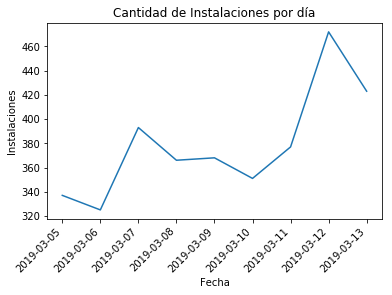

In [76]:
dates.plot(x = 'date', rot = 45)
plt.title('Cantidad de Instalaciones por día')
plt.xlabel('Fecha')
plt.ylabel('Instalaciones')


Se observa un incremento en las ventas para el día 12/03 y 13/03 en comparación al comportamiento habitual.

# Explorando por Marca y Modelo